Aqui estão as informações diarias de vendas da chocolura do mês de outubro e novembro

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('C:\\Users\\pedro\\Downloads\\material+curso+-+Time+Series\\material curso - Time Series\\vendas_por_dia.csv')
df.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [64]:
print("Exibindo a quantidade de linhas e de colunas: ", df.shape)

Exibindo a quantidade de linhas e de colunas:  (61, 2)


In [65]:
df.dtypes

dia       object
vendas     int64
dtype: object

In [66]:
df['dia'] = pd.to_datetime(df['dia'])
df.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [67]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [68]:
df['aumento'] = df['vendas'].diff()
df.head()

,dia,vendas,aumento
0,2018-10-01,50,NaN
1,2018-10-02,48,-2.0
2,2018-10-03,56,8.0
3,2018-10-04,50,-6.0
4,2018-10-05,51,1.0


In [69]:
df['aceleracao'] = df['aumento'].diff()
df.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


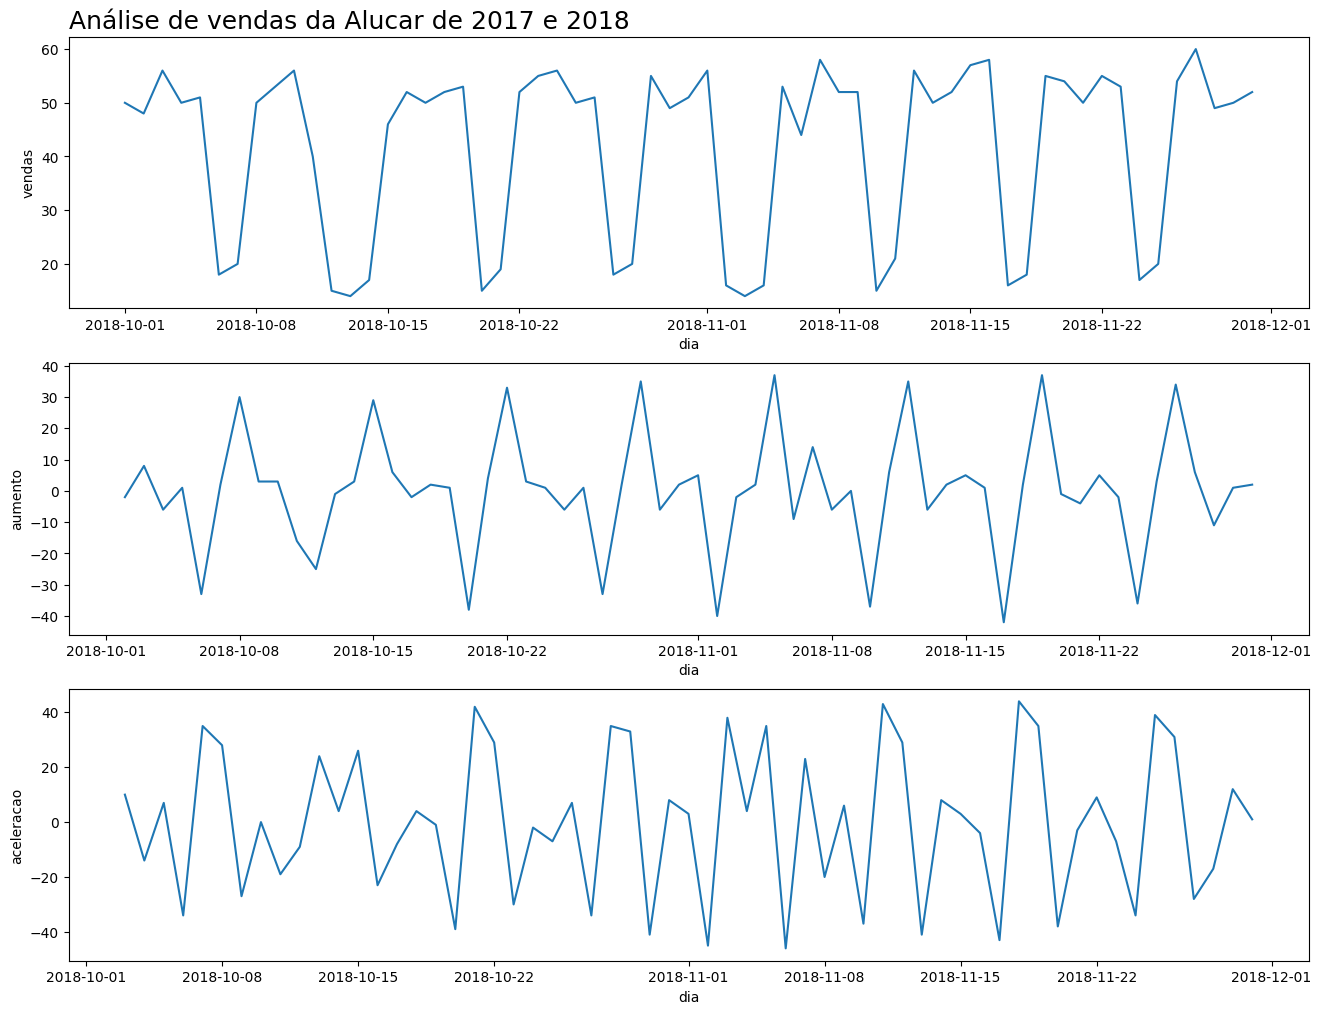

In [70]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='dia', y='vendas', data=df)
plt.subplot(3,1,2)
sns.lineplot(x='dia', y='aumento', data=df)
plt.subplot(3,1,3)
sns.lineplot(x='dia', y='aceleracao', data=df)
ax=ax

In [ ]:
df['dia_da_semana'] = df['dia'].dt.dayofweek

# Aqui é como se fosse uma tradução, que é aplicada com a função map
dias = {
    0: 'Segunda',
    1: 'Terça',
    2: 'Quarta',
    3: 'Quinta',
    4: 'Sexta',
    5: 'Sábado',
    6: 'Domingo'
}

df['dia_da_semana'] = df['dia'].dt.dayofweek.map(dias)


df.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo


Vendo a média dos dias das semanas de forma agrupada

In [72]:
df = df.groupby("dia_da_semana")[['vendas', 'aumento', 'aceleracao']].mean().round()
df

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


In [ ]:
from pandas.plotting import autocorrelation_plot

ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['vendas'])
ax = ax